¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto S6
Paso 1. Abre el archivo de datos y estudia la información general 

Ruta de archivo:

/datasets/games.csv . Descarga el dataset



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import scipy.integrate

In [2]:
df = pd.read_csv("games.csv")
print(df)

                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Ot

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

Paso 2. Prepara los datos

Reemplaza los nombres de las columnas (ponlos en minúsculas).
Convierte los datos en los tipos necesarios.
Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
Si es necesario, elige la manera de tratar los valores ausentes:
Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [4]:
#se transforma en mminúsculas todos los nombres
new_colnames = []
for name in df.columns:
    new = name.lower()
    new_colnames.append(new)
    
df.columns = new_colnames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#revisión de duplicados
print(df.duplicated().sum())

0


In [6]:
#tratamiento de vacíos y cambio de datos en year_of_release
pd.to_numeric(df['year_of_release'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se deja en blanco ya que es una información no disponible

In [7]:
#tratamiento de vacíos y cambio de datos en user_score
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Se deja en blanco ya que es una información no disponible, es perferible que no tnga ningun valor específico

In [8]:
#tratamiento de vacíos y cambio de datos
df['name'] = df['name'].fillna("ND")
df['genre'] = df['genre'].fillna("ND")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Andres! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    

    
Solamente te recomiendo que en estas columnas de 'critic_score'  mejor los completes con 'Unknown', puede ser en una columna duplicada. Además, te sugiero verificar si en el resto de las columnas no cuentas con datos ausentes que se deban ajustar.     

</div>

Para name y genre los valores vacíos se rellenan con ND

In [9]:
# Se crea la columna total_sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()
print(df.sample(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB
                                                    name platform  \
9305                                    Nayuta no Kiseki      PSP   
7004                                    NHL FaceOff 2001 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    

    
Solamente te recomiendo que dentro de la suma de total sales consideres la variable de other sales dado que tambien deben de sumar al total.     

</div>

# Paso 3. Analiza los datos
•	Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?


1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


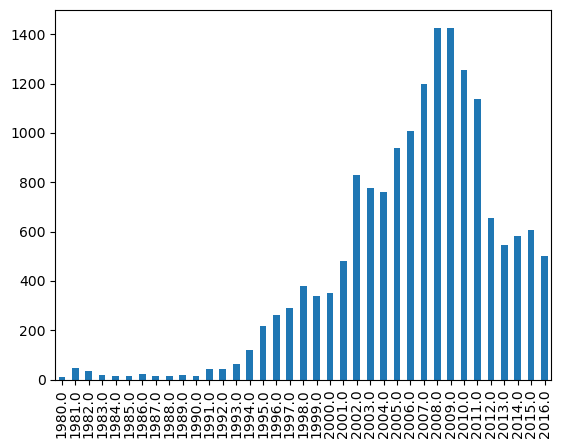

In [10]:
release = df["year_of_release"].value_counts().sort_index()
print(release)
release.plot(kind="bar")
plt.show()

Se distinguen 5 periodos:
1980 a 1993: la industria es muy pequeña se venden pocos juegos
1994 a 2005: existen mayor nuevo de juegos vendidos, la industria crece
2006 a 2011: se registran mayor salida de juegos
2012 a 2016: baja el número de juegosa la venta

•	Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980.0           11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1981.0           35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1982.0           28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1983.0            5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1984.0            0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1985.0            0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   
1986.0            0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1987.0            1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1988.0            0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   
1989.0            0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN   
1990.0             NaN   NaN

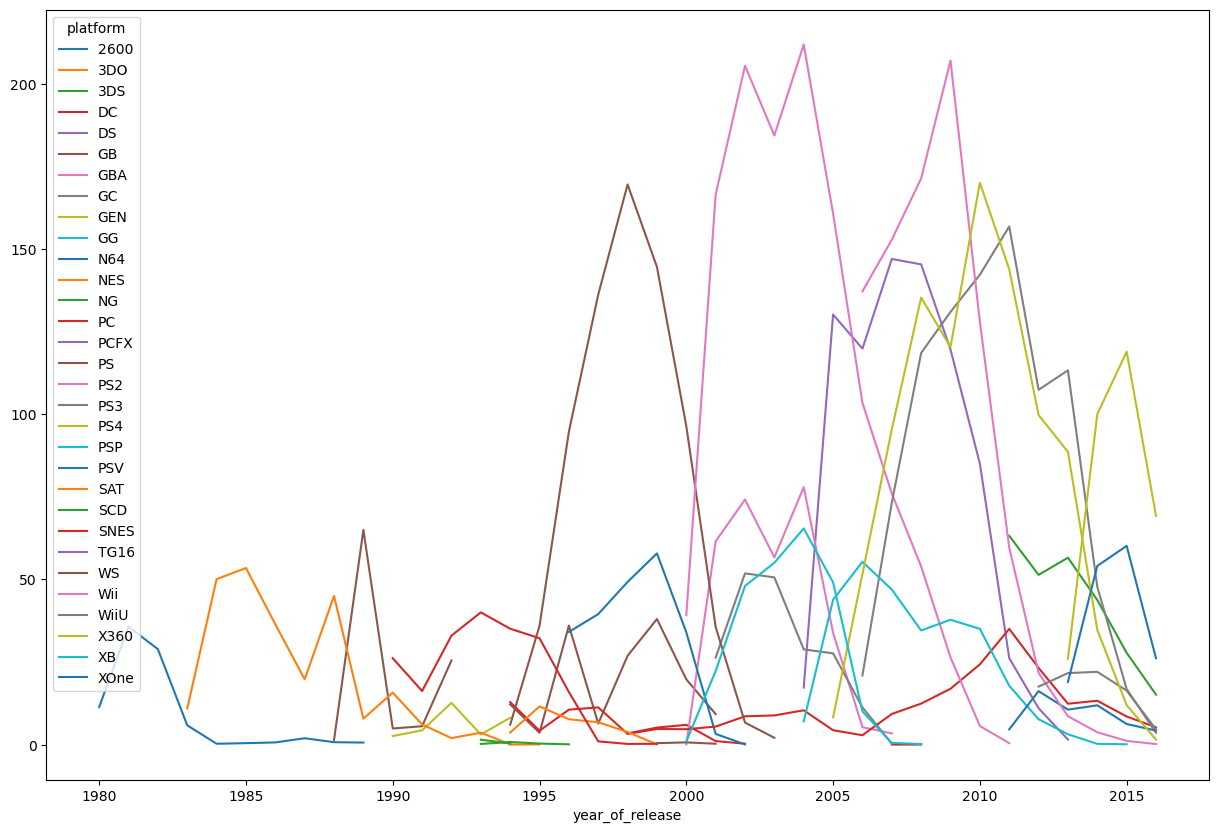

In [11]:
platform_sales = df.pivot_table(index="year_of_release",
                               columns="platform",
                               values="total_sales",
                               aggfunc="sum")
print(platform_sales)
platform_sales.plot(kind="line",
                   figsize=[15,10])
plt.show()

PS lidera las ventas del 1995 al 2003
PS2 lidera las ventas del 2000 al 2010
DS, Wii y X360 lideran las ventas del 2005 al 2012

•	Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017. •	Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.


Se trabajará con los datos desde el año 2005 al 2016

In [12]:
dfmodel = df[(df["year_of_release"] >= 2005)]
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11272 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11272 non-null  object 
 1   platform         11272 non-null  object 
 2   year_of_release  11272 non-null  float64
 3   genre            11272 non-null  object 
 4   na_sales         11272 non-null  float64
 5   eu_sales         11272 non-null  float64
 6   jp_sales         11272 non-null  float64
 7   other_sales      11272 non-null  float64
 8   critic_score     5645 non-null   float64
 9   user_score       5538 non-null   float64
 10  rating           7310 non-null   object 
 11  total_sales      11272 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.1+ MB


•	¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.


In [13]:
grp = dfmodel.groupby(["platform"])["total_sales"].sum().sort_values(ascending = False)
print(grp)

platform
X360    961.24
PS3     931.34
Wii     891.18
DS      785.49
PS2     426.46
PS4     314.14
PSP     282.47
3DS     257.81
PC      167.79
XOne    159.32
WiiU     82.19
XB       59.85
PSV      53.81
GBA      42.54
GC       39.15
DC        0.06
Name: total_sales, dtype: float64


•	Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.


In [14]:
platform_sales = df.pivot_table(index="year_of_release",
                               columns="platform",
                               values="total_sales",
                               aggfunc="sum")
print(platform_sales)

platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980.0           11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1981.0           35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1982.0           28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1983.0            5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1984.0            0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1985.0            0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   
1986.0            0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1987.0            1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1988.0            0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   
1989.0            0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN   
1990.0             NaN   NaN

In [29]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=platform_sales)
plt.title('Ventas Globales de Juegos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret input 'platform'

<Figure size 1400x800 with 0 Axes>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    

    
Muy buen trabajo! Pero en este caso ayudaría mucho al análisis contar con una grafica de cajas con todas las plataformas, para esto te puedes guiar del siguiente código:
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='platform', y='total_sales', data=platform_sales)
    plt.title('Ventas Globales de Juegos por Plataforma')
    plt.xlabel('Plataforma')
    plt.ylabel('Ventas Globales (en millones)')
    plt.xticks(rotation=90)
    plt.show()     

</div>

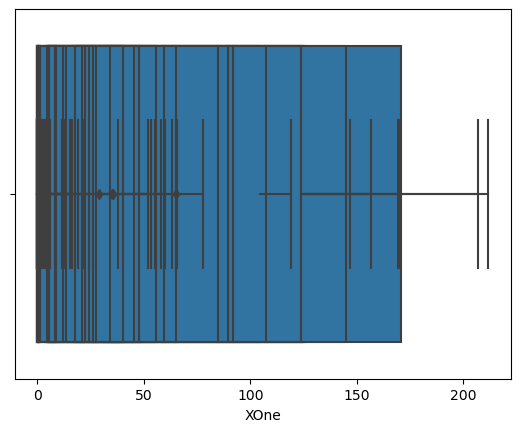

In [17]:
for column in platform_sales.columns:
    sns.boxplot(x = platform_sales[column])

count    11272.000000
mean         0.483928
std          1.553076
min          0.000000
25%          0.050000
50%          0.140000
75%          0.410000
max         82.540000
Name: total_sales, dtype: float64


<Axes: xlabel='total_sales'>

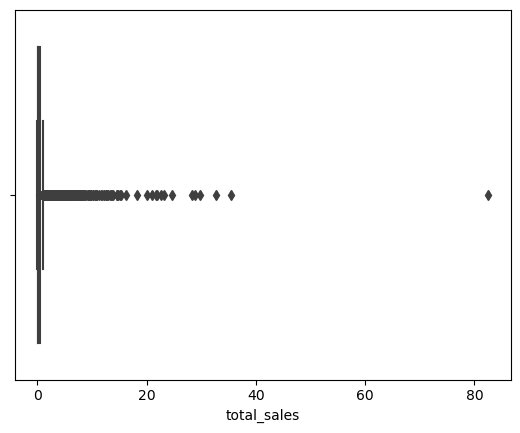

In [18]:
print(dfmodel["total_sales"].describe())

sns.boxplot(x = dfmodel["total_sales"])

•	Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.


[[ 1. nan]
 [nan nan]]


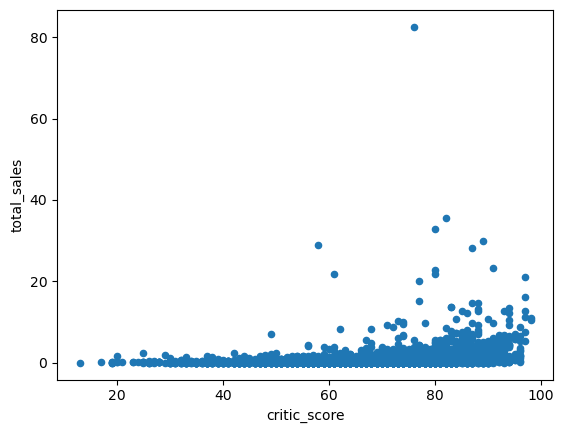

In [19]:
coef_c = np.corrcoef(dfmodel["total_sales"], dfmodel["critic_score"])
print(coef_c)

dfmodel.plot(kind="scatter",
        x="critic_score",
        y="total_sales")
plt.show()

Efectivamente existe una tendencia a que los juegos más vendidos tengan el mayor puntaje de critic_score

[[ 1. nan]
 [nan nan]]


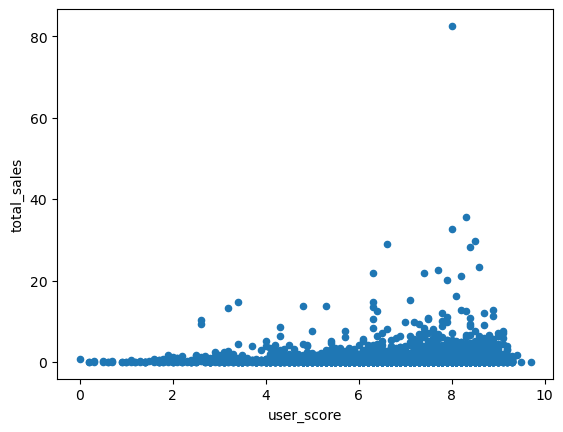

In [20]:
coef_u = np.corrcoef(dfmodel["total_sales"], dfmodel["user_score"])
print(coef_u)

dfmodel.plot(kind="scatter",
        x="user_score",
        y="total_sales")
plt.show()

De acuerdo al user_score se observa una tendencia menos marcada que con el critic_score

•	Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.


platform                       3DS  DC    DS  GBA  GC  PC  PS2   PS3  PS4  \
name                                                                        
 Beyblade Burst               0.03 NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
 Fire Emblem Fates            1.67 NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
 Frozen: Olaf's Quest         0.59 NaN  0.51  NaN NaN NaN  NaN   NaN  NaN   
 Haikyu!! Cross Team Match!   0.04 NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
 Tales of Xillia 2             NaN NaN   NaN  NaN NaN NaN  NaN  0.84  NaN   
...                            ...  ..   ...  ...  ..  ..  ...   ...  ...   
thinkSMART FAMILY!             NaN NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
thinkSMART: Chess for Kids     NaN NaN  0.01  NaN NaN NaN  NaN   NaN  NaN   
uDraw Studio                   NaN NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
uDraw Studio: Instant Artist   NaN NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
¡Shin Chan Flipa en colores!   NaN NaN  0.14  NaN NaN NaN  NaN   NaN  NaN   

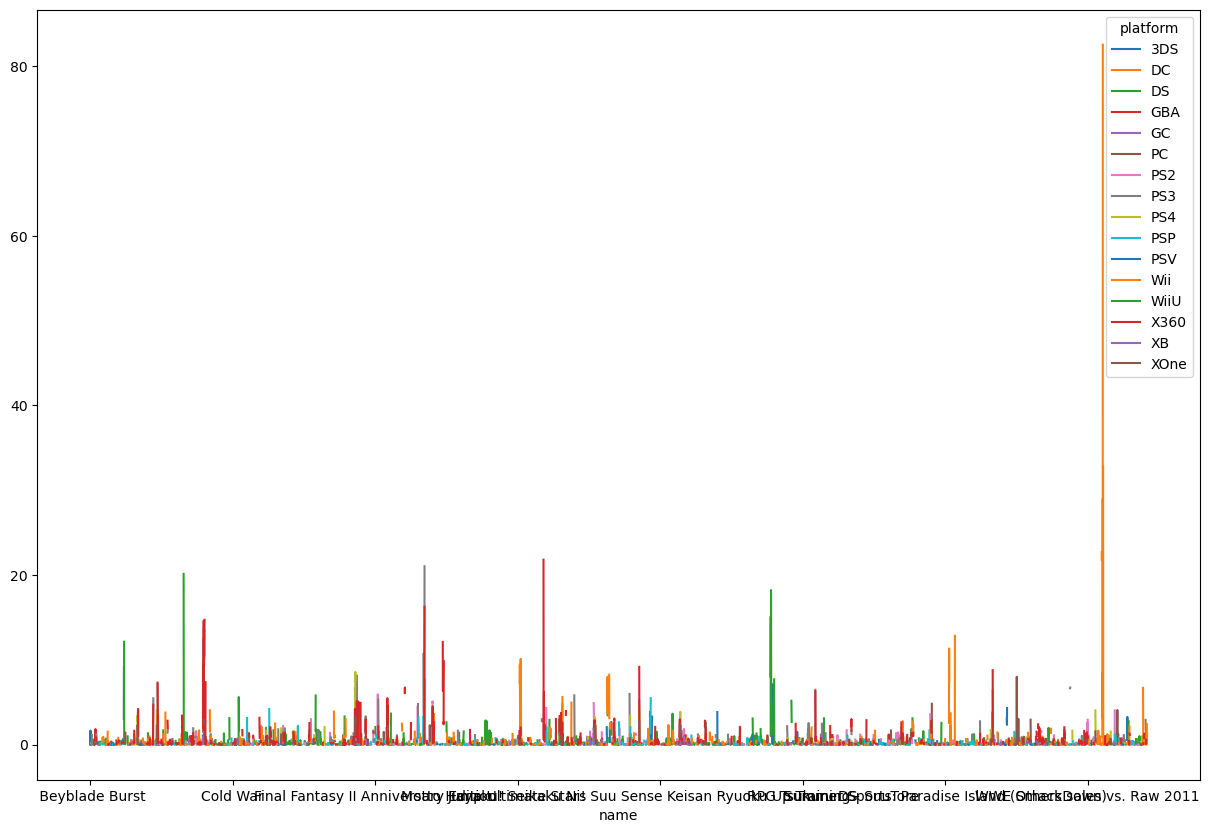

In [24]:
game_platform = dfmodel.pivot_table(index="name",
                               columns="platform",
                               values="total_sales",
                               aggfunc="sum")
print(game_platform)

game_platform.plot(figsize=[15,10])
plt.show()

•	Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

              total_sales
genre                    
Action            1202.04
Adventure          149.81
Fighting           208.07
Misc               615.83
Platform           303.06
Puzzle             110.28
Racing             355.03
Role-Playing       550.78
Shooter            758.56
Simulation         269.62
Sports             853.34
Strategy            78.42


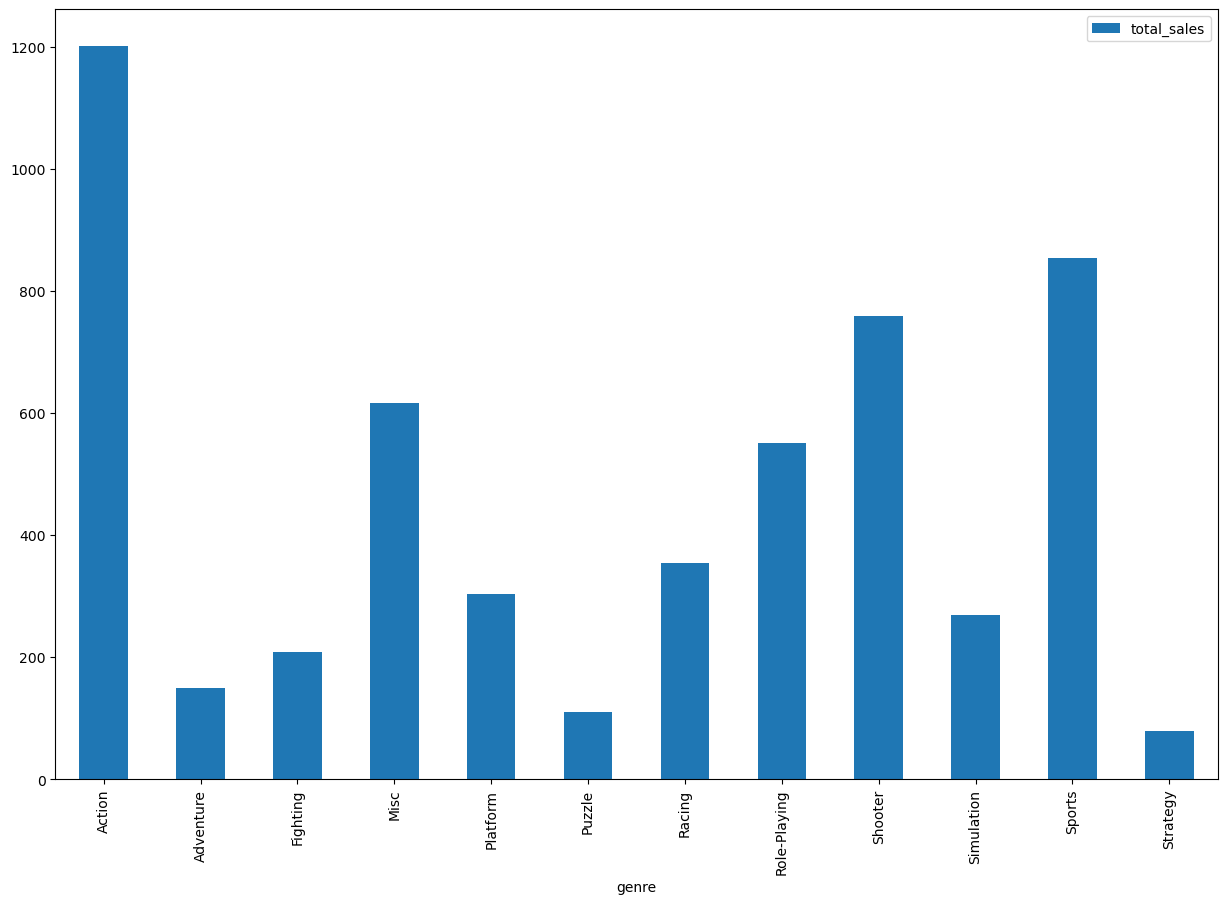

In [26]:
genre_sales = dfmodel.pivot_table(index="genre", 
                               values="total_sales",
                               aggfunc="sum")

print(genre_sales)
genre_sales.plot(kind="bar",
                   figsize=[15,10])
plt.show()

Paso 4. Crea un perfil de usuario para cada región
Para cada región (NA, UE, JP) determina:
•	Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [27]:
eu_platforms = dfmodel.pivot_table(index="platform",
                               values="eu_sales",
                               aggfunc="sum")
eu_platforms = eu_platforms.sort_values("eu_sales",ascending = False)

eu_sum = eu_platforms["eu_sales"].sum()
eu_platforms["%sales"] = eu_platforms["eu_sales"]*100/eu_sum
eu_platforms["%sales"] = round(eu_platforms["%sales"],1)

print(eu_platforms.head(5))


          eu_sales  %sales
platform                  
PS3         327.21    20.2
X360        268.32    16.6
Wii         258.32    16.0
DS          184.48    11.4
PS4         141.09     8.7


In [28]:
jp_platforms = dfmodel.pivot_table(index="platform",
                               values="jp_sales",
                               aggfunc="sum")
jp_platforms = jp_platforms.sort_values("jp_sales",ascending = False)

jp_sum = jp_platforms["jp_sales"].sum()
jp_platforms["%sales"] = jp_platforms["jp_sales"]*100/jp_sum
jp_platforms["%sales"] = round(jp_platforms["%sales"],1)

print(jp_platforms.head(5))

          jp_sales  %sales
platform                  
DS          171.35    27.8
3DS         100.62    16.3
PS3          79.41    12.9
PSP          73.85    12.0
Wii          68.28    11.1


In [ ]:
na_platforms = dfmodel.pivot_table(index="platform",
                               values="na_sales",
                               aggfunc="sum")
na_platforms = na_platforms.sort_values("na_sales",ascending = False)

na_sum = na_platforms["na_sales"].sum()
na_platforms["%sales"] = na_platforms["na_sales"]*100/na_sum
na_platforms["%sales"] = round(na_platforms["%sales"],1)

print(na_platforms.head(5))

•	Los cinco géneros principales. Explica la diferencia.


In [ ]:
eu_genre = dfmodel.pivot_table(index="genre",
                               values="eu_sales",
                               aggfunc="sum")
eu_genre = eu_genre.sort_values("eu_sales",ascending = False)

eu_sum = eu_genre["eu_sales"].sum()
eu_genre["%sales"] = eu_genre["eu_sales"]*100/eu_sum
eu_genre["%sales"] = round(eu_genre["%sales"],1)

print(eu_genre.head(5))

In [ ]:
jp_genre = dfmodel.pivot_table(index="genre",
                               values="jp_sales",
                               aggfunc="sum")
jp_genre = jp_genre.sort_values("jp_sales",ascending = False)

jp_sum = jp_genre["jp_sales"].sum()
jp_genre["%sales"] = jp_genre["jp_sales"]*100/jp_sum
jp_genre["%sales"] = round(jp_genre["%sales"],1)

print(jp_genre.head(5))

In [ ]:
na_genre = dfmodel.pivot_table(index="genre",
                               values="na_sales",
                               aggfunc="sum")
na_genre = na_genre.sort_values("na_sales",ascending = False)

na_sum = na_genre["na_sales"].sum()
na_genre["%sales"] = na_genre["na_sales"]*100/na_sum
na_genre["%sales"] = round(na_genre["%sales"],1)

print(na_genre.head(5))

•	Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [ ]:
eu_rating = dfmodel.pivot_table(index="rating",
                               values="eu_sales",
                               aggfunc="sum")
eu_rating = eu_rating.sort_values("eu_sales",ascending = False)

eu_sum = eu_rating["eu_sales"].sum()
eu_rating["%sales"] = eu_rating["eu_sales"]*100/eu_sum
eu_rating["%sales"] = round(eu_rating["%sales"],1)

print(eu_rating)

In [ ]:
jp_rating = dfmodel.pivot_table(index="rating",
                               values="jp_sales",
                               aggfunc="sum")
jp_rating = jp_rating.sort_values("jp_sales",ascending = False)

jp_sum = jp_rating["jp_sales"].sum()
jp_rating["%sales"] = jp_rating["jp_sales"]*100/jp_sum
jp_rating["%sales"] = round(jp_rating["%sales"],1)

print(jp_rating)

In [ ]:
na_rating = dfmodel.pivot_table(index="rating",
                               values="na_sales",
                               aggfunc="sum")
na_rating = na_rating.sort_values("na_sales",ascending = False)

na_sum = na_rating["na_sales"].sum()
na_rating["%sales"] = na_rating["na_sales"]*100/na_sum
na_rating["%sales"] = round(na_rating["%sales"],1)

print(na_rating)


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis exploratorio de los datos. Desarrollaste gráficas de box-plots para analizar ventas de las plataformas que más venden, scatter plots para ver la relación entre las score de usuarios y de los criticos respecto a las ventas, gráficas para identificar los juegos más populares en las distintas plataformas, gráficas de barras para analizar los géneros de juegos más populares y agregaste la conclusión y la interpretación de cada uno de estos resultados.   

</div>

 <div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Solamente te recomiendo desarrollar una gráfica de box-plots para analizar ventas de las plataformas que más venden. En este sentido en el eje de las X tendrías las plataforma y en el de las Y las ventas globales  

</div>

Paso 5. Prueba las siguientes hipótesis:
Establece tu mismo el valor de umbral alfa.
Explica:
— Cómo formulaste las hipótesis nula y alternativa.
— Qué criterio utilizaste para probar las hipótesis y por qué

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis nula: Las calificaciones promedio de los usuarios (user_score)para las plataformas Xbox One y PC son las mismas o iguales
Hipótesis alternativa: Las calificaciones promedio de los usuarios (user_score)para las plataformas Xbox One y PC son diferentes

In [ ]:
dfmodel_xone = df[(df["platform"] == "XOne")]
dfmodel_xone.info()

print(dfmodel_xone["user_score"].describe())

sns.boxplot(x = dfmodel_xone["user_score"])

In [ ]:
# CORRECCION VALORES ATIPICOS
score_xone= dfmodel_xone["user_score"]
print ("El número de datos de score_xone es:", len(score_xone))
print()
# Calcular pencentiles
cuartil3 = score_xone.quantile(0.75)
cuartil1 = score_xone.quantile(0.25)

# Calcular IQR
iqr = cuartil3 - cuartil1

# Límites upper y lower
upper = cuartil3 + (1.5 * iqr)
lower = cuartil1 - (1.5 * iqr)

#Eliminar outliers
corr_score_xone = score_xone.where((score_xone > lower) & (score_xone < upper), None)
corr_score_xone = corr_score_xone.dropna()
print ("El número de datos de corr_score_xone es:", len(corr_score_xone))

In [ ]:
dfmodel_pc = df[(df["platform"] == "PC")]
dfmodel_pc.info()

print(dfmodel_pc["user_score"].describe())
print(len(dfmodel_pc["user_score"]))
sns.boxplot(x = dfmodel_pc["user_score"])

In [ ]:
#CORRECCION DE VALORES ATIPICOS
score_pc= dfmodel_pc["user_score"]
print ("El número de datos de score_pc es:", len(score_pc))
print()
# Calcular pencentiles
cuartil3 = score_pc.quantile(0.75)
cuartil1 = score_pc.quantile(0.25)

# Calcular IQR
iqr = cuartil3 - cuartil1

# Límites upper y lower
upper = cuartil3 + (1.5 * iqr)
lower = cuartil1 - (1.5 * iqr)

#Eliminar outliers
corr_score_pc = score_pc.where((score_pc > lower) & (score_pc < upper), None)
corr_score_pc = corr_score_pc.dropna()
print ("El número de datos de corr_score_pc es:", len(corr_score_pc))

In [ ]:
#levene
levene_stat, p_value = st.levene(corr_score_xone, corr_score_pc)

print("Levene's test statistic:", levene_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes.")
else:
    print("No hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes. Las varianzas son probablemente similares.")

print()

In [ ]:
# Prueba las hipótesis
alpha = 0.05  # el nivel de significancia estadística crítica

# si el valor p es menor que alpha, rechazamos la hipótesis

results = scipy.stats.ttest_ind(corr_score_xone, corr_score_pc, equal_var = True) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

Existe un 0.00001% de probabilidad de que las calificaciones promedio sean iguales, por lo tanto se rechaza la hipótesis nula

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipótesis nula: Las calificaciones promedio de los usuarios (user_score) para los géneros de Acción y Deportes son las mismas o iguales
Hipótesis alternativa: Las calificaciones promedio de los usuarios (user_score) para los géneros de Acción y Deportes son diferentes

In [ ]:
dfmodel_action = df[(df["genre"] == "Action")]
dfmodel_action.info()

print(dfmodel_action["user_score"].describe())

sns.boxplot(x = dfmodel_action["user_score"])

In [ ]:
#CORRECCION DE VALORES ATIPICOS
score_action= dfmodel_action["user_score"]
print ("El número de datos de score_action es:", len(score_action))
print()
# Calcular pencentiles
cuartil3 = score_action.quantile(0.75)
cuartil1 = score_action.quantile(0.25)

# Calcular IQR
iqr = cuartil3 - cuartil1

# Límites upper y lower
upper = cuartil3 + (1.5 * iqr)
lower = cuartil1 - (1.5 * iqr)

#Eliminar outliers
corr_score_action = score_action.where((score_action > lower) & (score_action < upper), None)
corr_score_action = corr_score_action.dropna()
print ("El número de datos de corr_score_action es:", len(corr_score_action))

In [ ]:
dfmodel_sports = df[(df["genre"] == "Sports")]
dfmodel_sports.info()

print(dfmodel_sports["user_score"].describe())

sns.boxplot(x = dfmodel_sports["user_score"])

In [ ]:
#CORRECCION DE VALORES ATIPICOS
score_sports= dfmodel_sports["user_score"]
print ("El número de datos de score_sports es:", len(score_sports))
print()
# Calcular pencentiles
cuartil3 = score_sports.quantile(0.75)
cuartil1 = score_sports.quantile(0.25)

# Calcular IQR
iqr = cuartil3 - cuartil1

# Límites upper y lower
upper = cuartil3 + (1.5 * iqr)
lower = cuartil1 - (1.5 * iqr)

#Eliminar outliers
corr_score_sports = score_sports.where((score_sports > lower) & (score_sports < upper), None)
corr_score_sports = corr_score_sports.dropna()
print ("El número de datos de corr_score_sports es:", len(corr_score_sports))

In [ ]:
#levene
levene_stat, p_value = st.levene(corr_score_action, corr_score_sports)

print("Levene's test statistic:", levene_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes.")
else:
    print("No hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes. Las varianzas son probablemente similares.")

print()

In [ ]:
# Prueba las hipótesis
alpha = 0.05  # el nivel de significancia estadística crítica

# si el valor p es menor que alpha, rechazamos la hipótesis

results = scipy.stats.ttest_ind(corr_score_xone, corr_score_pc, equal_var = False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

Existe un 0.00000176%  de proobabilidad de que las promedios sean iguales. Por lo tanto, se considera que las medias de las calificaciones son diferentes

Paso 6. Escribe una conclusión general

Las industrias tienen comportamientos diferentes en el tiempo, en este caso, se ha observado visto que en la década de los 2000 se desarrollaron más juegos sin embargo,